In [2]:
# load libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt





,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839


# Portfolio Math  and Diversification

---

**🎯 Learning Objectives**

In this section we will learn how to do some basic math at portfolio level. You will know how to calculate return, expected return, and volatility given portfolio weights.

By the end of this chapter, you should be able to:


1. **See risk through a portfolio lens.**  
   Grasp Markowitz’s insight that an asset’s danger depends on what it adds to the *whole* mix, not on its stand-alone volatility.

2. **Express returns, means, and variance with matrix algebra.**  
   Use $R_p   =  R W$, $E[R_p]=W' E[R]$, and $\text{Var}(R_p)=W' \Sigma W$ to avoid loops and scale instantly from two assets to hundreds.

3. **Quantify diversification benefits.**  
   Investigate how adding a higher-volatility asset can *lower* portfolio variance when correlations are below one, and plot the US–international efficient frontier.

4. **Compute and interpret portfolio weights.**  
   Distinguish long-only, short, and leveraged positions; verify that weights sum to one (or note where leverage breaks that rule).





---


## Why do you need to think about portfolios?


1. The great insight from Harry Markowitz was to think of risk in terms of what the stock adds to your portfolio

1. Just like meat can be good for you if you are not eating any meat, it is terrible if you are eating a lot of it

1. What investors should care about is, just like eaters, their final diet. If a given stock brings a lot of what you already have, it will be bad for you, i.e., risky.

1. So volatility is a good gauge of risk at the portfolio level, because it is asking how your whole portfolio behaves, which you obviously should care about. If it goes down a lot, it means you cannot buy stuff!

1. But when thinking about a specific stock, it's volatility means very little.

1. Unless your entire portfolio is just that stock, you don't really need to bear the stock risk--if you have 1% in a stock and the stock drops to ZERO, that is only 1% in your portfolio, so at most you lose 1%. So whatever volatility this stock might have you SHOULD not perceive the stock as very risky for you.

1. As long, of course, your position in the stock remains small.

1. Note that if this stock would move together with other pieces of your portfolio then your calculation should be very different. If this stock goes to zero exactly when your other assets are also losing a lot of money, this will feel very risky trade.


1. The amount of covariance across stocks will be a key determinant of how much we can hold very volatile stocks without adding much overall risk to our portfolio

## **Portfolio weights**

* The portfolio weight for stock $j$ , denoted $w_j$, is the fraction of a portfolio value held in stock $j$

  $$w_j=\frac{\text{Dollar held in stock j}}{\text{Dollar value of portfolio}}$$
  
* By construction, the portfolio weights allways add up to one: you invest all you got somewhere, and nothing more

  * This doesn't mean that you can't borrow to invest, just means that you will have a negative weight somewhere offsetting the positive position in the other assets
  * But if the weights do not add up to one, then it is NOT a portfolio!

   $$\sum_{j=1}^N w_j=1$$
  
  * In matrix notation
  
  $$\mathbf{1}'W=1$$
  
  * where $\mathbf{1}$ is a N by 1 vector of 1's (i.e. a vector with entry 1 in each position) and $W$ is the N by 1 vector of portfolio weights

**Portfolio returns** are just the dollar-weighted average of the individual position returns

$$ r_p=\sum_{j=1}^N w_jr_j=W'R$$


* Where $R$ is the N by 1 vector of realized asset returns

* I use big R and big W here to emphasize that they are vectors, like  ($[r^{RF},r^{MKT},..]$), ($[w^{RF},w^{MKT},..]$),

* I use litlle $r_p$ becasue the return on a portfolio is just a scalar




**Our Data set**

> We will think about portfolios using a data set that contains monthly data on returns of 
> - diversified portfolios of US  equities
> - XUS developed market equities (typically refered as "international" in the industry)
> - emerging market equities
> - US  government bonds
> - XUS developed markets government bonds
>
> We will work directly with excess returns as it is more convenient in this case

In [ ]:
# We will import a the data set from our github repository by pointing directly to the url

url="https://raw.githubusercontent.com/amoreira2/Lectures/main/assets/data/GlobalFinMonthly.csv"
# this is a csv file so I am using pandas read_csv function and telling it that -99 means NA
Data = pd.read_csv(url,na_values=-99)
# Here I tell python that the Date column is a date, to_datetime is a pandas function that converts strings to dates
Data['Date']=pd.to_datetime(Data['Date'])
#Here I set the Date column as the index of the dataframe. This makes it easier to work with time series data as I can use date based indexing
Data=Data.set_index(['Date'])

# make it excess returns by subtracting the risk-free rate
Rf=Data['RF']
Data=Data.drop(columns=['RF']).subtract(Data['RF'],axis=0)
Data

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-02-28,-0.0238,-0.004178,0.095922,-0.005073,NaN
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839
...,...,...,...,...,...
2016-08-31,0.0050,-0.008617,0.024986,0.000638,-0.009752
2016-09-30,0.0025,-0.016617,0.012953,0.012536,0.009779
2016-10-31,-0.0202,-0.049660,0.002274,-0.020583,-0.043676


In [ ]:
# drop rows with missing values
Data=Data.dropna()
Data

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
1963-03-31,0.0308,0.001042,0.011849,-0.001929,-0.000387
1963-04-30,0.0451,-0.004343,-0.149555,-0.005836,0.005502
1963-05-31,0.0176,-0.004207,-0.014572,-0.002586,0.002289
1963-06-30,-0.0200,-0.000634,-0.057999,-0.013460,0.000839
1963-07-31,-0.0039,0.000700,0.085891,0.005200,-0.000799
...,...,...,...,...,...
2016-08-31,0.0050,-0.008617,0.024986,0.000638,-0.009752
2016-09-30,0.0025,-0.016617,0.012953,0.012536,0.009779
2016-10-31,-0.0202,-0.049660,0.002274,-0.020583,-0.043676


In [ ]:
# for example here is the return on a particular month


Data.loc['2008-09']

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
Date,,,,,
2008-09-30,-0.0924,0.022193,-0.176397,-0.145744,-0.032762


* Since the return on a portfolio is a weighted sum of the returns on the securities, we need to determine how the distribution of this sum of r.v. ($R_p$) is related to the orignal distribution of eah r.v. (the individual securities returns $R_j$, $j=1...N$).

* The analysis of portfolio risk becomes much simpler by assuming that return distributions are normal.

* This means we only need to worry about mean and variance (even if we care about these really bad tail events)

In [72]:
# lets start by constructing an equal-weighted portfolio
W=np.ones((5,1))/5

W


array([[0.2],
       [0.2],
       [0.2],
       [0.2],
       [0.2]])

In [6]:
np.sum(W)

np.float64(1.0)

In [73]:
Data.loc['9/2008'] @ W

,0
Date,
2008-09-30,-0.085022


Now lets say we want to compute the returns of your portfolio across all dates. Do we need to do a for loop?

NO! Avoid a for loop like the plague! Matrix algebra-- believe it or not not--is your friend

Say R is a vector T by N of historical asset returns (T periods N assets)

Say W is a vector N by 1 of weights

Then

$$R_p=R@W$$

Is a T by 1 vector of historical portfolio returns

What is happening? Each row of R has the date t returns. When we do this "vector" multiplication we multiply each rwo of the matrix on the left with the vector on the right, so each row of the resulting vector is exactly the returns of our portforio in a given date!


In [9]:
Data.shape

(647, 5)

In [74]:
Rp=Data @ W
Rp

,0
Date,
1963-03-31,0.008275
1963-04-30,-0.021826
1963-05-31,-0.000295
1963-06-30,-0.018251
1963-07-31,0.017418
...,...
2016-08-31,0.002451
2016-09-30,0.004230
2016-10-31,-0.026369


<Axes: xlabel='Date'>

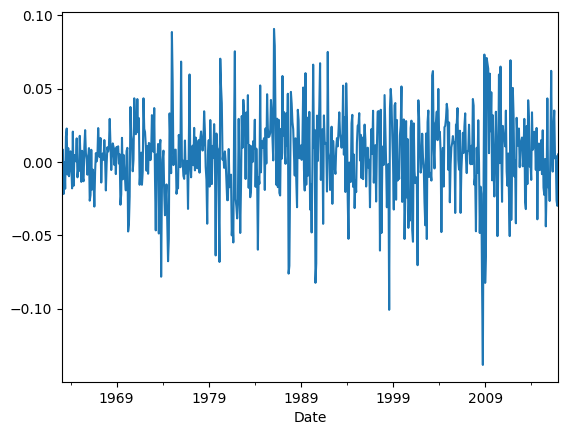

In [11]:
Rp.plot()

In [12]:
Rp.mean()

np.float64(0.004144225707430341)

## **Portfolio Expected returns**

* Averages and expectations are linear
   * If you expect tomorrow temperature to be 60F, how much you expect 4*"tomorrow temperature" to be?
     
* The expected return of a portfolio is the dollar weighted average of the expected returns of the individual assets.


$$E[R_p]=E[\sum_{j=1}^N w_jr_j]=\sum_{j=1}^N w_jE[r_j]=W'E[R]$$

This means that our average estiamtor also have this property!

$$\hat{E}[R_p]=\sum_t^T \frac{R_{p,t}}{T}=\sum_t^T \frac{\sum_{j=1}^N w_jr_{j,t}}{T}=\sum_{j=1}^N w_j\sum_t^T \frac{r_j}{T}=W'\hat{E}[R]$$


* Lets compute for our equal weighted portfolio:

In [43]:
# estimate the expected return

E_hat=Data.mean()
E_hat

,0
MKT,0.005140
USA30yearGovBond,0.002523
EmergingMarkets,0.006923
WorldxUSA,0.004149
WorldxUSAGovBond,0.002054


In [75]:
# We use transpose function `T` to transpose W to a 1 by 5 matrix

W.T @ E_hat


array([0.00415789])

In [77]:
# or we can isntead do so the dimensions line up

E_hat @ W

array([0.00415789])

It should be true that taking the sample mean of our portfolio return realizations should give the same answer

In [76]:
(Data @ W).mean()

,0
0,0.004144


or more directly

In [19]:
Rp.mean()

np.float64(0.004144225707430341)

## **Portfolio Variance**

Why the portfolio variance is not just the dollar weighted averages of the asset variances?





**Two asset case:**

$$Var(r_p)= Var(w_1r_1+w_2r_2)=Cov(w_1r_1+w_2r_2,w_1r_1+w_2r_2)$$

* where we used that $Var(x)=Cov(x,x)$

* This yields the classic formula

$$Var(r_p)= w_1^2Var(r_1)+2w_2w_1Cov(r_2,r_1)+w_2^2Var(r_2)$$

**N-asset case**

From the "term distribution"  above it is intuitive what the N asset case would look like


$$Var(r_p)= Var(\sum_{j=1}^N w_jr_j)=\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)$$


* For a portfolio of 50 assets, this expression has 50 variance terms and 2450 covariance terms!



* We can use our matrix algebra notation to again avoid a nasty double for loop

$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)=W' Cov(R) W$$

* where $Cov(R)$ is the N by N variance covariance matrix of the assets and W is the vector of weights





In [78]:
print(W.shape)
print(Data.cov().shape)

(5, 1)
(5, 5)


In [79]:
Cov_hat=Data.cov()
Cov_hat

,MKT,USA30yearGovBond,EmergingMarkets,WorldxUSA,WorldxUSAGovBond
MKT,0.001950,0.000111,0.001298,0.001265,0.000187
USA30yearGovBond,0.000111,0.001229,-0.000204,-0.000013,0.000264
EmergingMarkets,0.001298,-0.000204,0.003550,0.001664,0.000249
WorldxUSA,0.001265,-0.000013,0.001664,0.002185,0.000422
WorldxUSAGovBond,0.000187,0.000264,0.000249,0.000422,0.000407


In [80]:
W.T @ Cov_hat @ W

,0
0,0.000792


We can check that this vector notation deliver the same as the double sum by using two for loops



$$\sum_{j=1}^N \sum_{i=1}^N w_jw_iCov(r_j, r_i)=W' Cov(R) W$$



In [83]:
cov=Data.cov()
covariance_sum=0 #initiate the sum at zero
for i in cov.index: # loop across all assets
    for j in cov.columns:
        i_pos=cov.index.get_loc(i) # this gets the position of the particular asset so we can locate the proper posiiton on the vector
        j_pos=cov.columns.get_loc(j) # same thing, but for the other asset in the double sum
        covariance_sum=covariance_sum+cov.loc[i,j]*W[i_pos,0]*W[j_pos,0]


covariance_sum

np.float64(0.0007923455067886969)

**Diversification**

* A key concept in investing is diversification

* The famous: "don't put all your eggs in one basket" advice

* There are potential benefits of diversifcation for an investor when there are assets that  are imperfecly correlated with the investor portfolio

* So lets look at this from the vantage point of a US investors that is fully invested in the US equity market portfolio and is considering the benefits of investing in other world equity markets

In [84]:
# here is the co-movement across the asset
Data[['MKT','WorldxUSA']].corr()

,MKT,WorldxUSA
MKT,1.000000,0.613103
WorldxUSA,0.613103,1.000000


What is noteworthy about this correlation matrix?

Are there any benefits of diversification?

Lets compute how the variance of the investor portfolio varies as she varies her portfolio weight on the world market

But first note that the US market is less volatile than the international market

Which portfolio you expect to have the lowest vol given that information?

In [86]:
Data.std()*12**0.5

,0
MKT,0.152959
USA30yearGovBond,0.121422
EmergingMarkets,0.206384
WorldxUSA,0.161923
WorldxUSAGovBond,0.069854


In [87]:

D=Data.loc[:,['MKT','WorldxUSA']]
x_us=1
x_int=1-x_us
W=np.array([x_us,x_int])
Rp=D@ W
Rp.std()*12**0.5

0.15295861105099787

- International has the highest vol, US the lowest
- Which portfolio achieves the lowest vol? x_us=1? x_us=0? something else?

In [25]:
w=np.arange(,,)
w

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [88]:
D=Data.loc[:,['MKT','WorldxUSA']]
UsW=[]
# w here is a vector of weights on the US MKT and 1-w is the the weight on the international market

for x_us in w:
    W=np.array([x_us,1-x_us])
    # save the weight on the world market as the first element of UsW

    Rp=D@ W # construct time series of portfolio returns
    vol=Rp.std()*12**0.5 # estimate portfolio standard deviation
    # vol=((W.T @ D.cov() @ W)**0.5)*12**0.5 # the  alternative way of estimating the vol
    UsW.append([x_us,1-x_us,vol])


In [ ]:
# Make a sacatter plot
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Weight on World')
#plt.ylim([0.04,0.05])
plt.show()

* We can also look at the investment frontier that such an investor faces: How her expected returns change with the variance

* Lets also look at annualized quantities for more intution

* always keep in mind that this is only the in-sample investment frontier because we are relying on the sample averages to construct it

In [ ]:
D.mean()*12

MKT          0.061684
WorldxUSA    0.049788
dtype: float64

In [ ]:
D.std()*12**0.5

MKT          0.152891
WorldxUSA    0.161802
dtype: float64

In [89]:
UsW=[]
for x_us in w:
    W=np.array([x_us,1-x_us])
    # save the weight on the world market as the first element of UsW
    # save the annulized vol of the portfolio as the second element of UsW
    # save the annulized expected return of the portfolio as the third element of UsW
    vol=(W.T @ D.cov() @ W*12)**0.5
    er=W.T @ np.array(D.mean())*12
    UsW.append([1-x_us,vol,er])
UsW=np.array(UsW)

In [ ]:
# UsW[:,1], the annulized vol of the portfolio
# UsW[:,2], the annulized expected return of the portfolio
plt.scatter(UsW[:,1],UsW[:,2])
plt.xlabel('Volatility')
plt.ylabel('Average excess return')

plt.show()


* Which allocation should you choose?

* How international  investors benefit from holding US stocks?

* How US investors benefit of holding international stocks?


  


---

**📝 Key Takeaways**


- **Matrix algebra is your friend.**  A single line replaces nested loops when calculating returns, expectations, and variance.  
- **Diversification is all about correlations.**  Pairing volatile but imperfectly correlated assets can cut overall risk more than simply holding the lower-volatility asset alone.  





---

   